# Project 4 West-Nile Virus

Members: Eng Seng, Jin, Qi Wen, Song Yuan

## Table of Contents

- [1.Merge Cleaned Train, Test, Spray, Weather Data](#1.-Merge-Cleaned-Train,-Test,-Spray,-Weather-Data)<br>
- [2.Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)<br>
    - [2.1 Number of Samples with West Nile Virus](#2.1-Number-of-Samples-with-West-Nile-Virus)<br>
    - [2.2 Number of Positive and Negative West Nile Virus Samples Across Years](#2.2-Number-of-Positive-and-Negative-West-Nile-Virus-Samples-Across-Years)<br>
    - [2.3 Number of Mosquitoes with Positive and Negative West Nile Virus Across Months](#2.3-Number-of-Mosquitoes-with-Positive-and-Negative-West-Nile-Virus-Across-Months)<br>
    - [2.4 Mosquitoes Species vs Number of Samples](#2.4-Mosquitoes-Species-vs-Number-of-Samples)<br>
    - [2.5 Mosquito Species vs Positive West Nile Virus Cases](#2.5-Mosquito-Species-vs-Positive-West-Nile-Virus-Cases)<br>
    - [2.6 Total Number of Mosquitoes by Species Each Year](#2.6-Total-Number-of-Mosquitoes-by-Species-Each-Year)<br>
    - [2.7 Top Traps with Positive West Nile Virus](#2.7-Top-Traps-with-Positive-West-Nile-Virus)<br>
    - [2.8 Maps Spray Coverage, Traps, Positive West Nile Virus Locations](#2.8-Maps-Spray-Coverage,-Traps,-Positive-West-Nile-Virus-Locations)<br>
        - [2.8.1 Year 2011](#2.8.1-Year-2011)<br>
        - [2.8.2 Year 2011 Across Months](#2.8.2-Year-2011-Across-Months)<br>
        - [2.8.3 Year 2013](#2.8.3-Year-2013)<br>
        - [2.8.4 Year 2013](#2.8.4-Year-2013-Across-Months)<br>
        - [2.8.5 Spray Coverage vs Top Traps with Positive West Nile Virus](#2.8.5-Spray-Coverage-vs-Top-Traps-with-Positive-West-Nile-Virus)<br>
    - [2.9 Correlation Heatmap](#2.9-Correlation-Heatmap)<br>

## Import Libraries

In [42]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#see all columns / rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## 1. Merge Cleaned Train, Test, Spray, Weather Data

In the provided data, both station 1 and 2 had recorded weather data. So we will choose and match the nearest station for each trap in our train dataset.

In [2]:
#import cleaned data
train = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')
spray = pd.read_csv('../datasets/spray_clean.csv')
weather = pd.read_csv('../datasets/weather_clean.csv')

Define function to get the nearest station for each traps.

<font size = 3 color = "crimson"> In the future, consider using geopy for distance calcuation
https://www.geeksforgeeks.org/python-calculate-distance-between-two-places-using-geopy/
</font>



In [3]:
def get_distance(lat1, lon1, lat2, lon2): 
    '''This function converts the coordinates to radians and 
    calculates the distance between the two coordinates'''
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1 

    temp = (  
         math.sin(d_lat / 2) ** 2 
       + math.cos(lat1) 
       * math.cos(lat2) 
       * math.sin(d_lon / 2) ** 2
    )

    return 6373.0 * (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))

def nearest_weather_station(trap_lat, trap_lon):
    '''This function calculates the distance between the trap and station using their coordinates'''
    station1_lat = 41.995 
    station1_lon = -87.933 
    station2_lat = 41.786 
    station2_lon = -87.752
    
    #calculate trap distance with station 1 / 2
    dist_station1 = get_distance(station1_lat,station1_lon,trap_lat,trap_lon)
    dist_station2 = get_distance(station2_lat,station2_lon,trap_lat,trap_lon)
    
    #compare distances
    if dist_station1 > dist_station2:
        return 2
    else:
        return 1

In [4]:
#apply function to new column station to determine which station is nearest
train['Station'] = train.apply(lambda x: nearest_weather_station(x.Latitude,x.Longitude), axis = 1)
test['Station'] = test.apply(lambda x: nearest_weather_station(x.Latitude,x.Longitude), axis = 1)

In [5]:
#merge data on date and station
train_weather = pd.merge(train, weather, how='left', on=['Date','Station'])
test_weather = pd.merge(test, weather, how='left', on=['Date','Station'])

In [6]:
#export merged data
train_weather.to_csv('../datasets/train_weather.csv', index=False)
test_weather.to_csv('../datasets/test_weather.csv', index=False)

In [7]:
train_weather.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,total_mos,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,4,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5


In [8]:
test_weather.head()

,Id,Date,Species,Block,Street,Trap,Latitude,Longitude,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,86.0,61.0,74.0,7,56,64.0,0.0,9.0,416,1926,Moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
1,2,2008-06-11,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,86.0,61.0,74.0,7,56,64.0,0.0,9.0,416,1926,Moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
2,3,2008-06-11,CULEX PIPIENS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,86.0,61.0,74.0,7,56,64.0,0.0,9.0,416,1926,Moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
3,4,2008-06-11,CULEX SALINARIUS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,86.0,61.0,74.0,7,56,64.0,0.0,9.0,416,1926,Moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
4,5,2008-06-11,CULEX TERRITANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,1,86.0,61.0,74.0,7,56,64.0,0.0,9.0,416,1926,Moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6


## 2. Exploratory Data Analysis

In [9]:
#import merged data
train_weather = pd.read_csv('../datasets/train_weather.csv')
test_weather = pd.read_csv('../datasets/test_weather.csv')

In [10]:
train_weather.head()

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,total_mos,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,1,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,4,1,88.0,60.0,74.0,10,58,65.0,0.0,9.0,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5


In [11]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8610 non-null   object 
 1   Species      8610 non-null   object 
 2   Block        8610 non-null   int64  
 3   Street       8610 non-null   object 
 4   Trap         8610 non-null   object 
 5   Latitude     8610 non-null   float64
 6   Longitude    8610 non-null   float64
 7   WnvPresent   8610 non-null   int64  
 8   total_mos    8610 non-null   int64  
 9   Station      8610 non-null   int64  
 10  Tmax         8610 non-null   float64
 11  Tmin         8610 non-null   float64
 12  Tavg         8610 non-null   float64
 13  Depart       8610 non-null   int64  
 14  DewPoint     8610 non-null   int64  
 15  WetBulb      8610 non-null   float64
 16  Heat         8610 non-null   float64
 17  Cool         8610 non-null   float64
 18  Sunrise      8610 non-null   int64  
 19  Sunset

In [12]:
train_weather['Date'] = pd.to_datetime(train_weather['Date'])

In [13]:
train_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Block,8610.0,38.793380,24.129378,10.000000,14.000000,37.000000,58.000000,98.000000
Latitude,8610.0,41.844422,0.107076,41.644612,41.750498,41.857402,41.944869,42.017430
Longitude,8610.0,-87.695237,0.084921,-87.930995,-87.752411,-87.694991,-87.642984,-87.531635
WnvPresent,8610.0,0.053078,0.224202,0.000000,0.000000,0.000000,0.000000,1.000000
total_mos,8610.0,15.683972,68.560634,1.000000,2.000000,4.000000,11.000000,2206.000000
Station,8610.0,1.707317,0.455021,1.000000,1.000000,2.000000,2.000000,2.000000
Tmax,8610.0,81.415679,8.413667,57.000000,78.000000,83.000000,87.000000,97.000000
Tmin,8610.0,63.529501,7.705123,41.000000,58.000000,65.000000,69.000000,79.000000
Tavg,8610.0,72.500232,7.580616,50.000000,70.000000,74.000000,78.000000,86.000000
Depart,8610.0,2.466667,6.601662,-12.000000,-2.000000,4.000000,7.000000,18.000000


### 2.1 Number of Samples with West Nile Virus

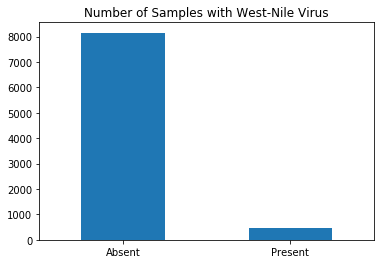

In [14]:
wnv_presence_counts = train_weather['WnvPresent'].value_counts()
wnv_presence_counts.plot(kind='bar',)
plt.title('Number of Samples with West-Nile Virus')
plt.xticks(ticks = wnv_presence_counts.index, labels = ['Absent','Present'], rotation=0);


**Observations**:<br>
Refering to the bar chart above, the dataset seems imbalanced. There were more than 8000 samples which do not contain West Nile Virus and less than 500 have West Nile Virus. We will perform an oversampling before modeling after EDA.

### 2.2 Number of Positive and Negative West Nile Virus Samples Across Years

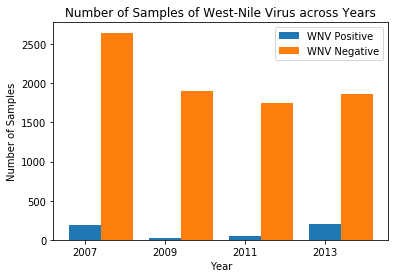

In [15]:
wnv_presence_year = train_weather.loc[train_weather['WnvPresent'] == 1,['Year','WnvPresent']].groupby('Year', as_index = False).count()
wnv_absence_year = train_weather.loc[train_weather['WnvPresent'] == 0,['Year','WnvPresent']].groupby('Year', as_index = False).count()

fig,ax = plt.subplots()
ax.bar(x = wnv_presence_year['Year'],height = wnv_presence_year['WnvPresent'], label='WNV Positive')
ax.bar(x = wnv_absence_year['Year']+0.8,height = wnv_absence_year['WnvPresent'], label='WNV Negative')


ax.set_title('Number of Samples of West-Nile Virus across Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Samples')
ax.set_xticks(ticks = [2007,2009,2011,2013])
ax.legend();

**Observations**:<br> 
Among the 4 years of data collections from both stations, the total sampling was done the most in 2007.There were highest Positive West Nile Virus case during year 2007 and year 2013, comparing both 2007 and 2013 sampling, the rate of the positive West Nile Virus had increased at year 2013.

### 2.3 Number of Mosquitoes with Positive and Negative West Nile Virus Across Months

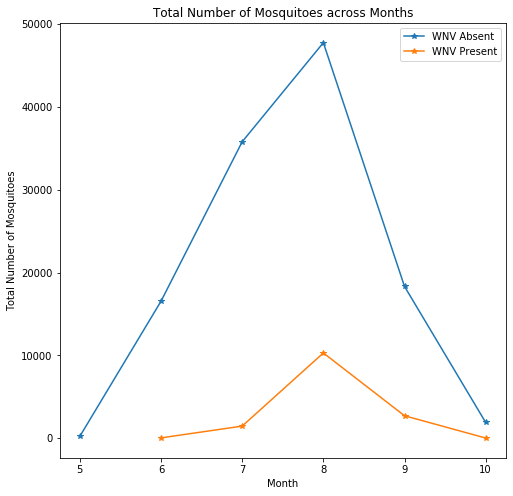

In [16]:
wnv_presence_month = train_weather.groupby(['Month','WnvPresent'], as_index=False)['total_mos'].sum()
wnv_presence_month_0 = wnv_presence_month.loc[wnv_presence_month['WnvPresent']== 0]
wnv_presence_month_1 = wnv_presence_month.loc[wnv_presence_month['WnvPresent']== 1]

plt.figure(figsize = (8,8))
plt.plot(wnv_presence_month_0['Month'],wnv_presence_month_0['total_mos'], marker = '*', label = "WNV Absent")
plt.plot(wnv_presence_month_1['Month'],wnv_presence_month_1['total_mos'], marker = '*', label = 'WNV Present')
plt.title('Total Number of Mosquitoes across Months')
plt.xlabel('Month')
plt.ylabel('Total Number of Mosquitoes')
plt.legend();

**Observations**: <br>
The data collections started from May which during the summer time,and the data collections stopped at October which winter is coming and mosquitoes will move into hibernation. From the graph shown above:
- Mosquito numbers start increasing from May, peaks in August and decreases from September.
- Prevalence of West Nile Virus increases from June, peaks in August and decreases from September.
- The West Nile Virus incubations is between 2 to 14 days, so the positive west nile virus only recorded during June. [here](https://www.mayoclinic.org/diseases-conditions/west-nile-virus/symptoms-causes/syc-20350320)

### 2.4 Mosquito Species vs Number of Samples

* <font size = 3 color = "crimson"> Can plot both the charts together for better comparison </font>

''

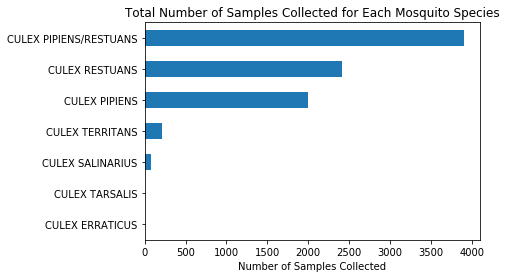

In [17]:
sample_count_species = train_weather["Species"].value_counts().sort_values(ascending=True)
sample_count_species.plot(kind='barh')
plt.title('Total Number of Samples Collected for Each Mosquito Species')
plt.xlabel('Number of Samples Collected')
;

**Observations** :<br>
Culex Pipens/Restuans is among the species that is the major species in the Chicago, next Culex Restuans and Culex Pipiens samples collected.

### 2.5 Mosquito Species vs Positive West Nile Virus Cases

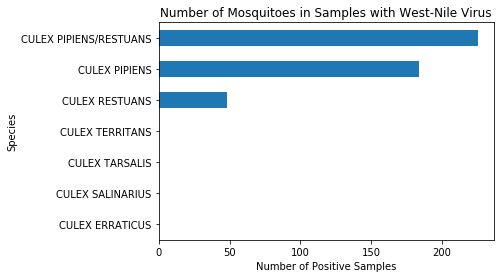

In [18]:
sample_wnv_species = train_weather[['Species', 'total_mos', 'WnvPresent']].groupby(by = 'Species').sum().sort_values(by='WnvPresent', ascending=True)
sample_wnv_species['WnvPresent'].plot(kind='barh')
plt.title('Number of Mosquitoes in Samples with West-Nile Virus')
plt.xlabel('Number of Positive Samples');

**Observations**:<br>
Refering the chart above, we can see that the  C. Restuans, C. Pipiens, and C. Pipiens/Restuans were tested positive for West-Nile Virus. The other species did not test positive, this could also might be due to lower number of samples collected. 

### 2.6 Total Number of Mosquitoes by Species Each Year 

In [19]:
species = list(train_weather['Species'].value_counts().index)
spray_dates = pd.to_datetime(list(spray['Date'].unique()))

In [20]:
def plot_line(year):
    species = list(train_weather['Species'].value_counts().index)
    plt.figure(figsize = (20,10))
    
    for s in species:
        temp = train_weather.loc[(train_weather['Year']==year) & (train_weather['Species'] == s),['Date','total_mos']].groupby('Date').sum()
        plt.plot(temp, marker = '*', label=s)

    plt.title(f'Total Number of Mosquitoes by Species in {year}', fontsize = 16)
    plt.yticks(ticks = np.arange(0,4500,500))
    plt.xticks(rotation = 45)
    plt.ylabel('Number of Mosquitoes', fontsize = 20)
    plt.xlabel('Date', fontsize = 20)
    
    for spray_date in spray_dates:
        if year == spray_date.year:
            plt.axvline(spray_date, color='black', linestyle='dashed', linewidth=2, label=f'Spray:{spray_date}', alpha=0.3)
            
    plt.legend()
;

''

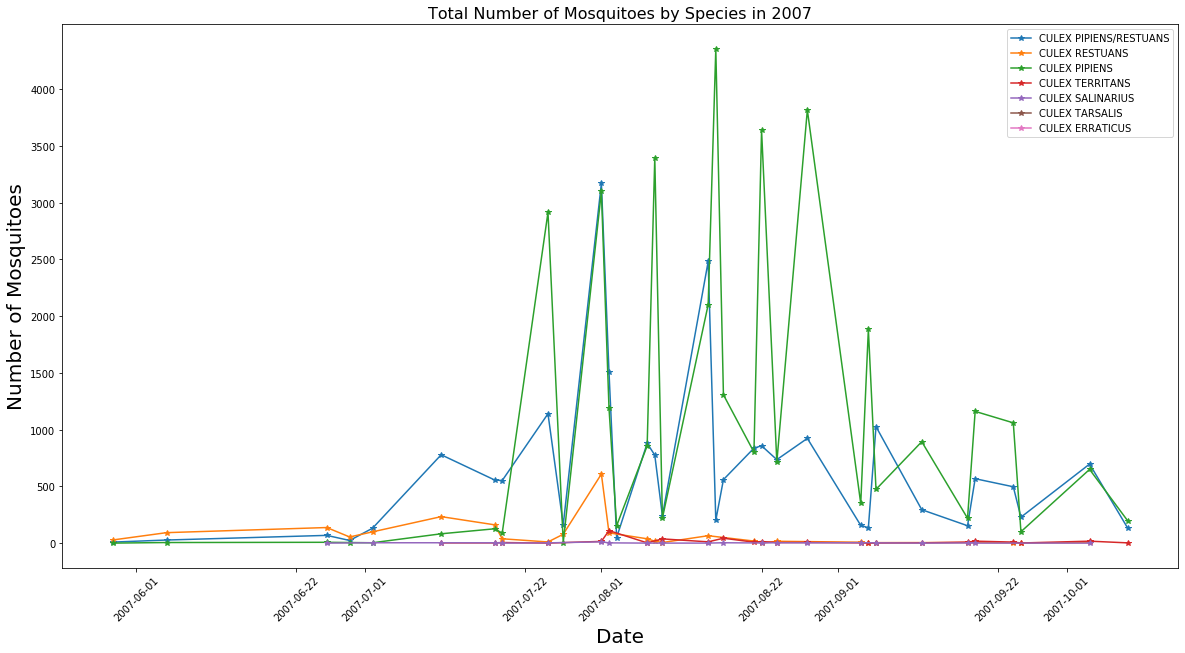

In [21]:
#2007
plot_line(2007)

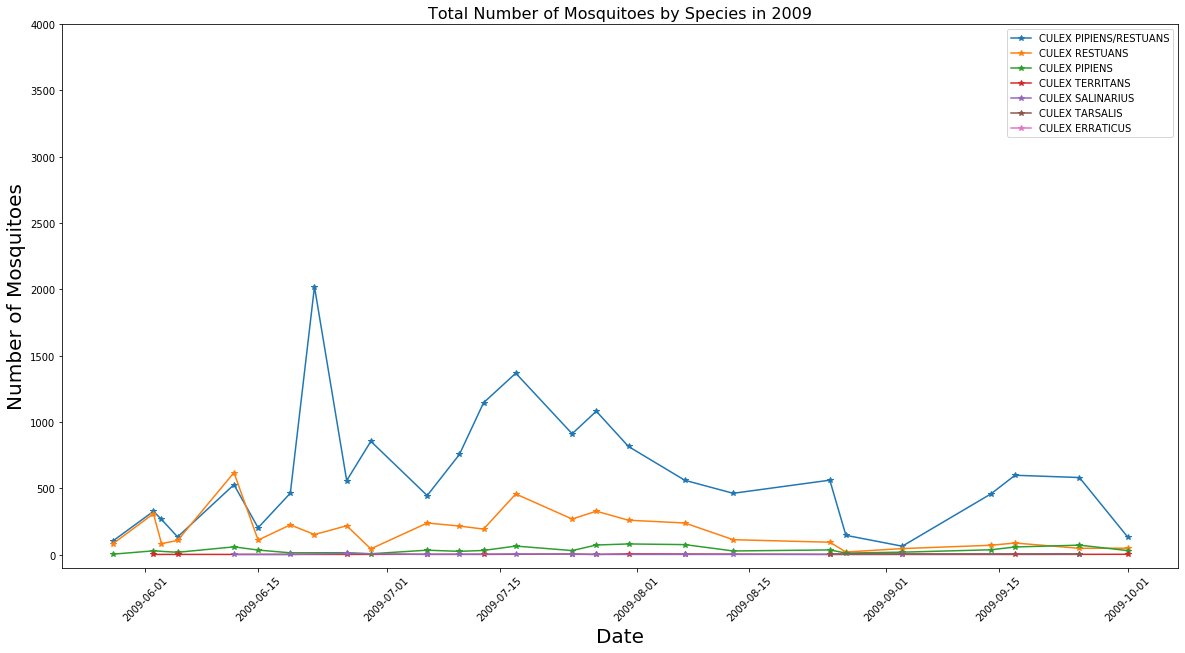

In [22]:
plot_line(2009)

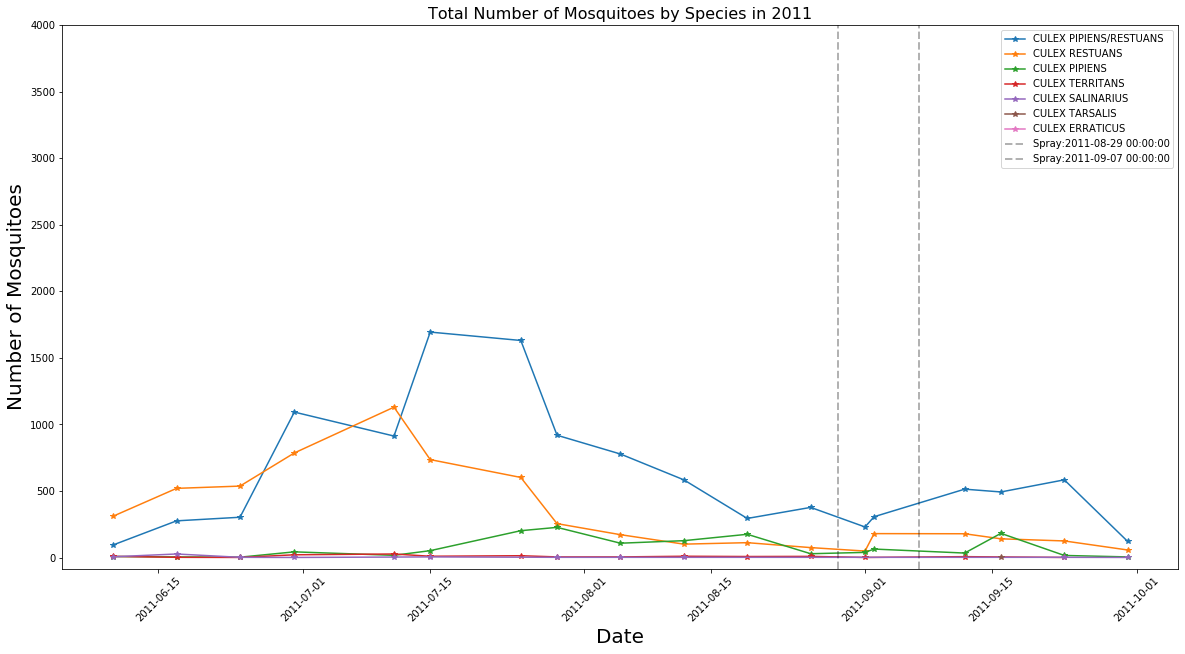

In [23]:
plot_line(2011)

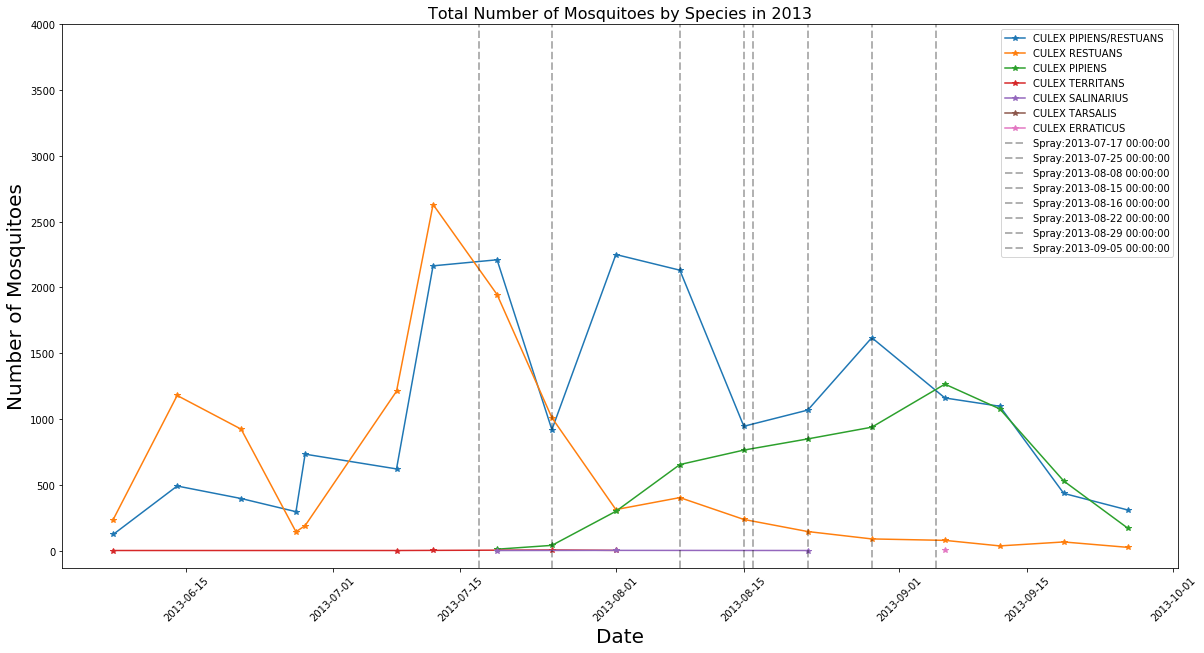

In [24]:
plot_line(2013)

**Observations**: <br>

- Each year, number of mosquitoes typically increase from mid-June / July, and decreases from September, peak during July.
- Spraying does not seem to have a very obvious effect on the number of mosquitoes.

### 2.7 Top Traps with Positive West Nile Virus

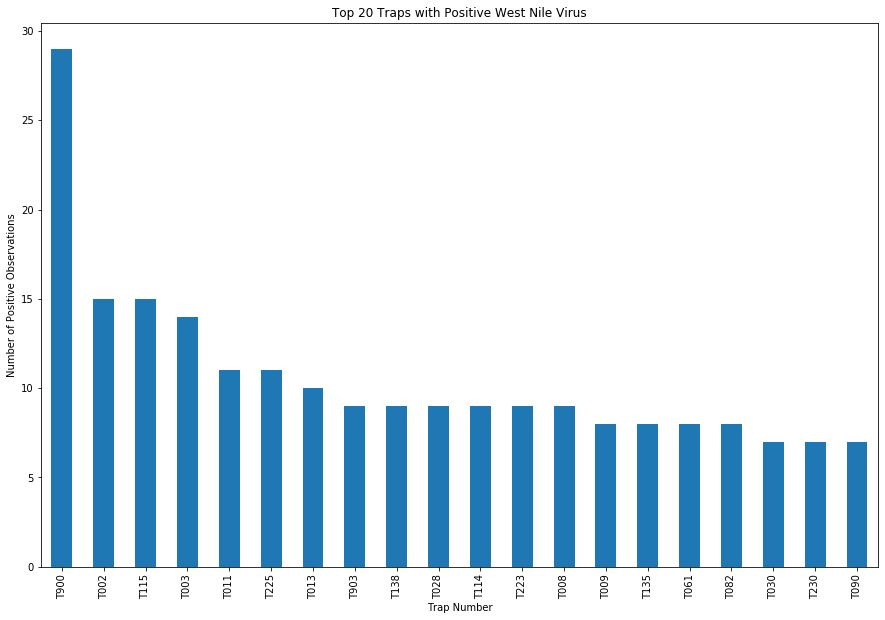

In [25]:
wnv_present_traps = train_weather.loc[train_weather['WnvPresent'] == 1,'Trap'].value_counts()[:20]
plt.figure(figsize=(15,10))
wnv_present_traps.plot(kind='bar')
plt.title('Top 20 Traps with Positive West Nile Virus')
plt.xlabel('Trap Number')
plt.ylabel('Number of Positive Observations');

**Observations**:<br>
T900 is the top trap with positive observations of West Nile Virus, followed by T115, T002, T003, which we may consider the area were the hot spot for the mosquitoes.


### 2.8 Maps Spray Coverage, Traps, Positive West Nile Virus Locations

#### 2.8.1 Year 2011

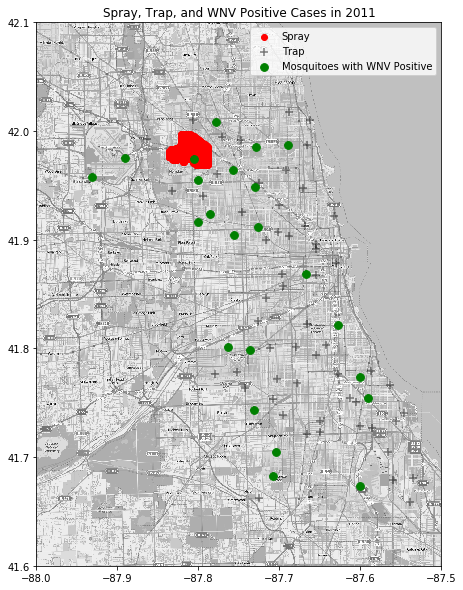

In [26]:

#load map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(8,10))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

#get 2011 trap data
traps = train_weather[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
traps_2011 = traps[traps["Date"].dt.year == 2011]
locations = traps_2011[['Longitude', 'Latitude']].drop_duplicates().values

#get 2011 spray data
spray = spray[spray['Longitude']>-88]
spray_2011 = spray[spray["Year"]== 2011]
sprays = spray_2011[['Longitude', 'Latitude']].drop_duplicates().values

#get 2011 wnvpresent data
wnvpresent_2011 = traps[(traps['WnvPresent'] == 1) & (traps["Date"].dt.year == 2011)]
wnvpresents = wnvpresent_2011[['Longitude', 'Latitude']].drop_duplicates().values


#plot
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1, label="Spray")
plt.scatter(locations[:,0], locations[:,1], s = 50, c='k',marker='+',label='Trap', alpha = 0.5)
plt.scatter(wnvpresents[:,0], wnvpresents[:,1], s = 60, c='g', marker='o', label='Mosquitoes with WNV Positive')

plt.title('Spray, Trap, and WNV Positive Cases in 2011')
plt.legend();



#### 2.8.2 Year 2011 Across Months

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


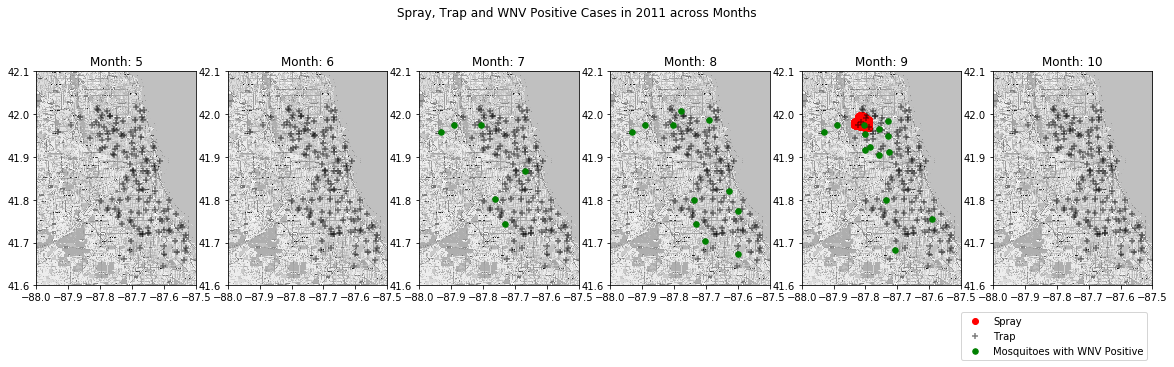

In [27]:
#load map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig,ax = plt.subplots(ncols = 6, nrows = 1, figsize=(20,5))

for i, month in enumerate(train_weather['Month'].unique()):
    ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

    #2011 traps data
    traps = train_weather[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

    #2011 spray data
    spray = spray[spray['Longitude']>-88]
    spray_2011_month = spray[spray["Year"]== 2011][spray["Month"] == month]
    sprays = spray_2011_month[['Longitude', 'Latitude']].drop_duplicates().values

    #2011 wnvpresent data
    wnvpresent_2011_month = traps[(traps['WnvPresent'] == 1) & (traps["Date"].dt.year == 2011) & (traps["Date"].dt.month == month)]
    wnvpresents = wnvpresent_2011_month[['Longitude', 'Latitude']].drop_duplicates().values

    ax[i].scatter(sprays[:,0], sprays[:,1], c='r', alpha=1, label="Spray")
    ax[i].scatter(locations[:,0], locations[:,1], s = 30, c='k',marker='+',label='Trap',alpha=0.5)
    ax[i].scatter(wnvpresents[:,0], wnvpresents[:,1], s = 30, c='g', marker='o', label='Mosquitoes with WNV Positive')

    ax[i].set_title(f'Month: {month}')
    
plt.suptitle('Spray, Trap and WNV Positive Cases in 2011 across Months')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, -0.1));

#### 2.8.3 Year 2013

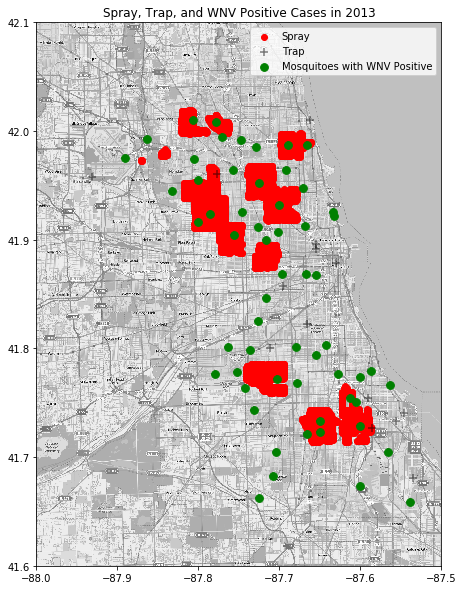

In [28]:
#load map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(8,10))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

#2013 traps data
traps = train_weather[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
traps_2013 = traps[traps["Date"].dt.year == 2013]
locations = traps_2013[['Longitude', 'Latitude']].drop_duplicates().values

#2013 spray data
spray = spray[spray['Longitude']>-88]
spray_2013 = spray[spray["Year"]== 2013]
sprays = spray_2013[['Longitude', 'Latitude']].drop_duplicates().values

#2013 wnvpresent data
wnvpresent_2013 = traps[(traps['WnvPresent'] == 1) & (traps["Date"].dt.year == 2013)]
wnvpresents = wnvpresent_2013[['Longitude', 'Latitude']].drop_duplicates().values


plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1, label="Spray")
plt.scatter(locations[:,0], locations[:,1], s = 50, c='k',marker='+',label='Trap',alpha=0.5)
plt.scatter(wnvpresents[:,0], wnvpresents[:,1], s = 60, c='g', marker='o', label='Mosquitoes with WNV Positive')

plt.title('Spray, Trap, and WNV Positive Cases in 2013')
plt.legend();

#### 2.8.4 Year 2013 Across Months

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


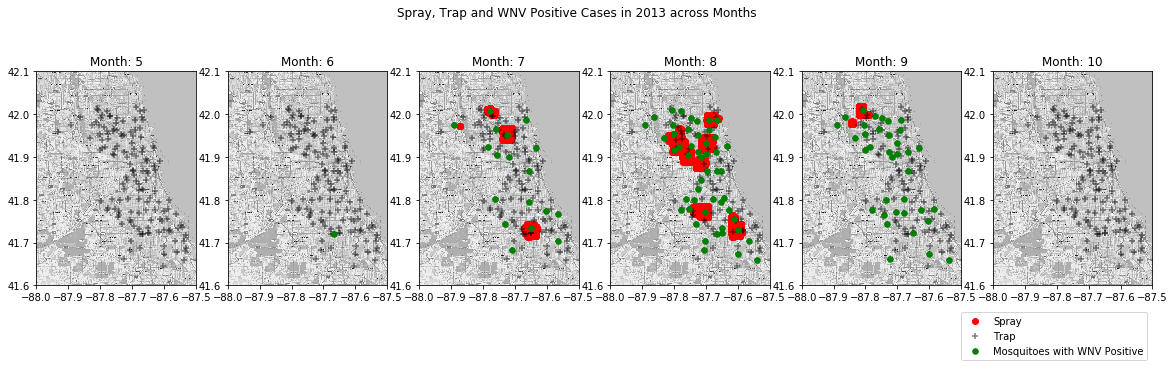

In [29]:
#load map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#plot subplots
fig,ax = plt.subplots(ncols = 6, nrows = 1, figsize=(20,5))

#plot 2013 monthly
for i, month in enumerate(train_weather['Month'].unique()):
    ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

    #2013 traps data
    traps = train_weather[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

    #2013 spray data
    spray = spray[spray['Longitude']>-88]
    spray_2013_month = spray[spray["Year"]== 2013][spray["Month"] == month]
    sprays = spray_2013_month[['Longitude', 'Latitude']].drop_duplicates().values

    #2013 wnvpresent data
    wnvpresent_2013_month = traps[(traps['WnvPresent'] == 1) & (traps["Date"].dt.year == 2013) & (traps["Date"].dt.month == month)]
    wnvpresents = wnvpresent_2013_month[['Longitude', 'Latitude']].drop_duplicates().values

    ax[i].scatter(sprays[:,0], sprays[:,1], c='r', alpha=1, label="Spray")
    ax[i].scatter(locations[:,0], locations[:,1], s = 30, c='k',marker='+',label='Trap',alpha=0.5)
    ax[i].scatter(wnvpresents[:,0], wnvpresents[:,1], s = 30, c='g', marker='o', label='Mosquitoes with WNV Positive')

    ax[i].set_title(f'Month: {month}')
    
plt.suptitle('Spray, Trap and WNV Positive Cases in 2013 across Months')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, -0.1));

#### 2.8.5 Spray Coverage vs Top Traps with Positive West Nile Virus

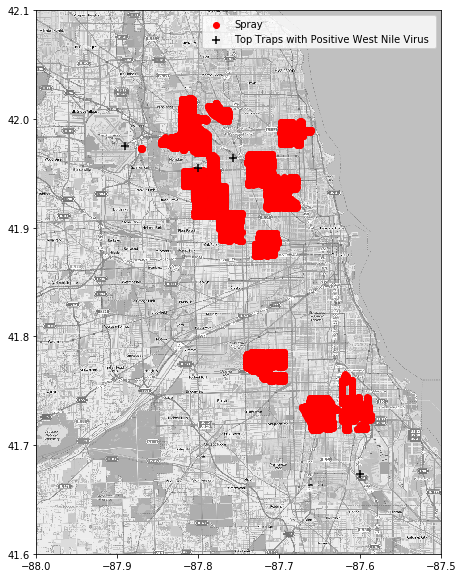

In [30]:
#load map data
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(8,10))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

#top 3 traps data
traps = train_weather[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
top_traps = traps[(traps['Trap'] == 'T900') | (traps['Trap'] == 'T115') | (traps['Trap'] == 'T002') | (traps['Trap'] =='T003')]
locations = top_traps[['Longitude', 'Latitude']].drop_duplicates().values

#2013 spray data
spray = spray[spray['Longitude']>-88]
sprays = spray[['Longitude', 'Latitude']].drop_duplicates().values


#2013 wnvpresent data
#wnvpresent = traps[(traps['WnvPresent'] == 1)]
#wnvpresents = wnvpresent[['Longitude', 'Latitude']].drop_duplicates().values


plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1, label="Spray")
plt.scatter(locations[:,0], locations[:,1], s = 50, c='k',marker='+',label='Top Traps with Positive West Nile Virus ')
#plt.scatter(wnvpresents[:,0], wnvpresents[:,1], s = 60, c='c', marker='o', label='Mosquitoes with WNV Positive',alpha=0.5)
plt.legend();

**Observations**: 
- Spraying did not cover many areas with WNV Positive Mosquitoes. 
- Spraying did not cover the top 3 locations with many WNV positive cases, except for Trap T002. 
- Spraying does not seem to have a huge effect. Month on month comparison after spraying shows that West Nile Virus was still present (except for Month: 9 where a possible explanation could be it has already became colder). Will likely need more information on how long after spraying does it take effect, or do a day-on-day comparison of spraying.

### 2.9 Correlation Heatmap

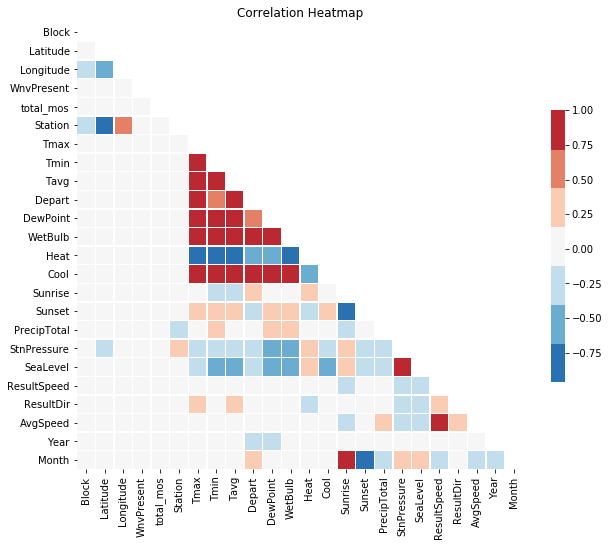

In [31]:
mask = np.zeros_like(train_weather.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(train_weather.corr(),
            mask = mask,            
            square=True,
            cbar_kws = {'shrink':0.5},
            linewidth = 0.5,
            linecolor = 'white',
            cmap=sns.color_palette("RdBu_r", 7))

plt.title("Correlation Heatmap");

**Observations**: 

There are some collinearity between these features:
- Tmin, Tmax, Tavg, DewPoint, WetBulb, Heat and Cool: Different parameters to measure the temperature. 
- SeaLevel and StnPressure measure the air pressure.  
- ResultSpeed and AvgSpeed measure the windspeed. 

#### Total Number of Mosquitos vs Different Average Temperatures

In [32]:
def plot_bar(dataframe, x, y, title, xlabel, ylabel):
    temp = dataframe.groupby([x])[y].sum().reset_index()
    plt.figure(figsize = (10,8))
    plt.bar(x = temp[x], height = temp[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

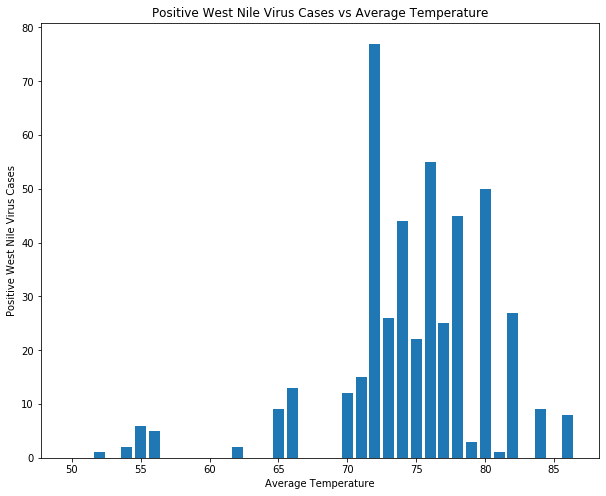

In [33]:
plot_bar(train_weather,'Tavg','WnvPresent',
         'Positive West Nile Virus Cases vs Average Temperature',
         'Average Temperature',
         'Positive West Nile Virus Cases')

**Observations**: There are more West Nile Virus positive cases on days with higher average temperature, primarily between 71 - 80F.

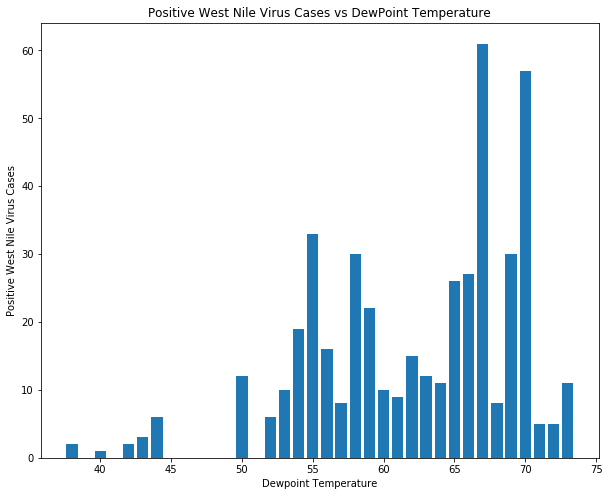

In [34]:
plot_bar(train_weather,'DewPoint','WnvPresent',
         'Positive West Nile Virus Cases vs DewPoint Temperature',
         'Dewpoint Temperature',
         'Positive West Nile Virus Cases')

**Observations**: There are more West Nile Virus positive cases on days when dew point is between 50 - 70F.

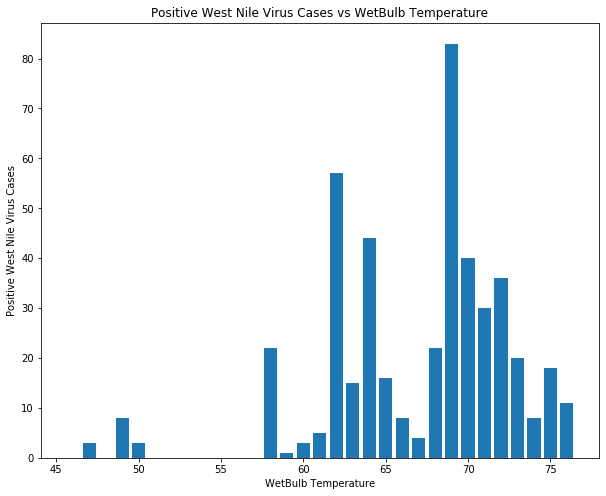

In [35]:
plot_bar(train_weather,'WetBulb','WnvPresent',
         'Positive West Nile Virus Cases vs WetBulb Temperature',
         'WetBulb Temperature',
         'Positive West Nile Virus Cases')

**Observations**: There are more West Nile Virus positive cases on days when wetbulb is between 62 - 72F.

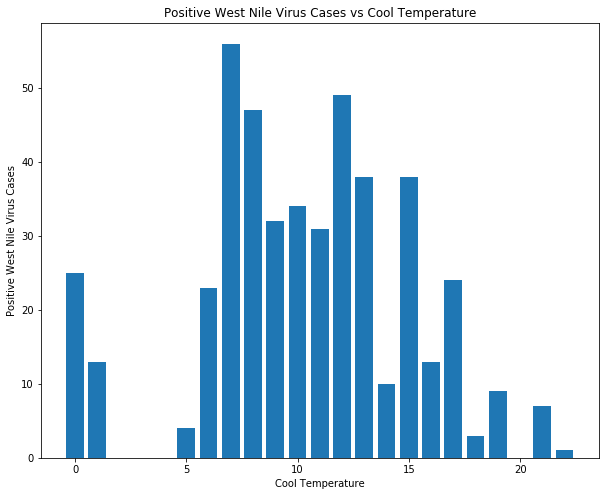

In [36]:
plot_bar(train_weather,'Cool','WnvPresent',
         'Positive West Nile Virus Cases vs Cool Temperature',
         'Cool Temperature',
         'Positive West Nile Virus Cases')

**Observations**: There are more West Nile Virus positive cases on days when cool temperature is between 6F - 15F

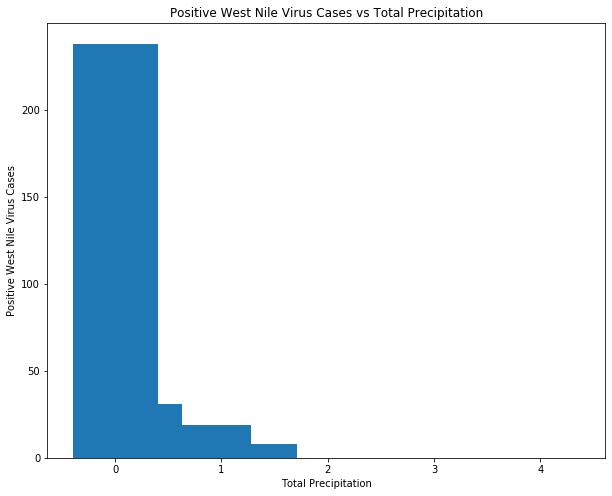

In [37]:
plot_bar(train_weather,'PrecipTotal','WnvPresent',
         'Positive West Nile Virus Cases vs Total Precipitation',
         'Total Precipitation',
         'Positive West Nile Virus Cases')

**Observations**: There are more West Nile Virus positive cases on days with no precipitation.

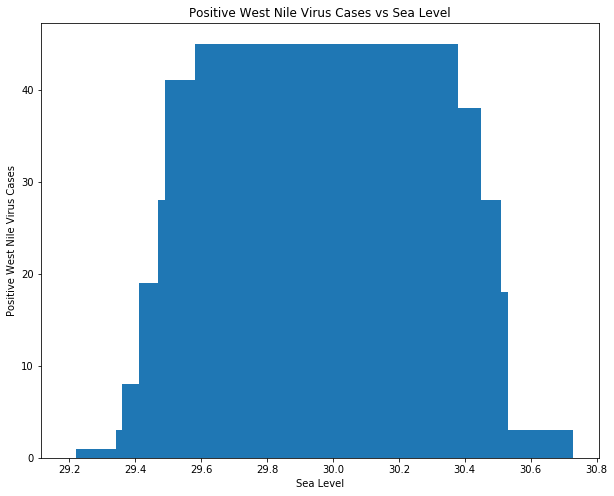

In [38]:
plot_bar(train_weather,'SeaLevel','WnvPresent',
         'Positive West Nile Virus Cases vs Sea Level',
         'Sea Level',
         'Positive West Nile Virus Cases')

**Observations**: West Nile Virus positive cases peaks when sea level is 29.6 - 30.4.

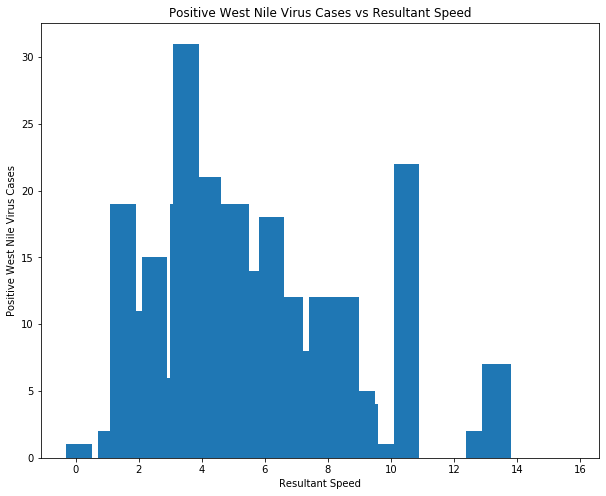

In [39]:
plot_bar(train_weather,'ResultSpeed','WnvPresent',
         'Positive West Nile Virus Cases vs Resultant Speed',
         'Resultant Speed',
         'Positive West Nile Virus Cases')

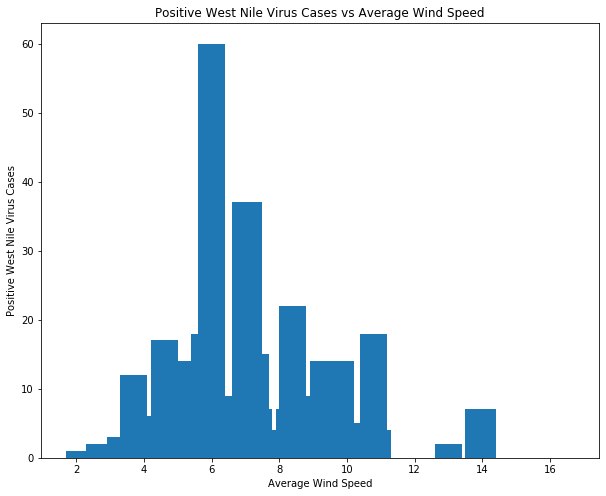

In [40]:
plot_bar(train_weather,'AvgSpeed','WnvPresent',
         'Positive West Nile Virus Cases vs Average Wind Speed',
         'Average Wind Speed',
         'Positive West Nile Virus Cases')